In [75]:
# Initialize Otter Grader
import otter
grader = otter.Notebook()

# Homework 7: Building a Classifier
## IEOR 135/290, Data-X: Applied Data Ventures
**Author:** Sudarshan Gopalakrishnan | UC Berkeley, B.S. EECS'21 (in collaboration with Ikhlaq Sidhu). Updated Fall 2020 by Johann Schleier-Smith.

___

#### NAME:  Haojuan He

#### STUDENT ID: 3033721461
___

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
!conda install py-xgboost --y
import xgboost as xgb

Solving environment: done

# All requested packages already installed.



# Objective
The purpose of this homework is to walk you through the data science cycle towards building a classical machine learning model.

In this homework, you will do the following:
* Explore the provided dataset
* Develop visualizations
* Formulate the hypothesis
* Clean and reformat the dataset to help you build a predictive model
* Develop features
* Build a predictive model

You are working with CalBank to build a classifier that will help them determine whether a loan profile is likely to be Fully Paid or Charged Off (i.e. written off given under the assumption that it won't be paid back).

In [77]:
data = pd.read_csv("hw_data.csv")
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Part 1: Data Cleaning
In this part, we will guide you through cleaning the dataset and prepare it for data exploration.

### **Question 1**: What are some potential problems with the above dataset? 

1.In several rows, there are Nan value.
2.Also another poential problems is that soke column might haveb all null value, so it should be dropped when processing the dataset.
3.Also, some of the input value might be incorrect. SUch us in the loan section we might see some default input value such as $999,9999,99

### **Question 2**: Several columns have missing data. Discuss how you would deal with missing data in each column, implement the changes and save it in the variable 'data_clean'

* **Loan ID:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells. Also use this to drop all the duplicate columns and rows in the dataframe
* **Customer ID:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Loan Status:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Current Loan Amount:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells. Also drop all the out-liers that have a value larger than 1 million dollar
* **Term:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Credit Score:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells. Also reduce the credit score that are larger than 850 by one digit.
* **Annual Income:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Years in current job:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Home Ownership:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Purpose:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Monthly Debt:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Years of Credit History:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Number of Credit Problems:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Current Credit Balance:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Maximum Open Credit:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Bankruptcies:** *drop rows with NaN value. This column should no longer have np.Nan attribute in cells
* **Tax Liens:** drop rows with NaN value. This column should no longer have np.Nan attribute in cells


In [78]:
# Do your data cleaning here
#data_clean = ...

In [79]:
for column in data.columns:
    if data[column].isnull().values.any():
        print(column)
data.shape

Loan ID
Customer ID
Loan Status
Current Loan Amount
Term
Credit Score
Annual Income
Years in current job
Home Ownership
Purpose
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


(88987, 19)

<!--
BEGIN QUESTION
name: q2a_cleaning_any_nan
manual: false
points: 1
-->

Here we have found out all the columns that contain NaN value, so our next step is to drop every cell in those cells (rows) that contain the Nan value.

In [80]:
data_rows = data.dropna(how='all', axis=0)
#drop rows that contain only all Nan value
#(this code cleaned the rows that have no significant information)
#data_nonnan = data_rows.dropna(how='any',axis = 0)
#drop rows that contain only any Nan value
data_rows.shape

(88473, 19)

Compare to the shape of the new dataframe to the previous dataframe, we can confirm that our new dataframe is significantly lower in row number

In [81]:
for column in data_rows.columns:
    if data_rows[column].isnull().values.any():
        print(column)


Credit Score
Annual Income
Years in current job
Months since last delinquent
Maximum Open Credit
Bankruptcies
Tax Liens


Here the printing statement does not print anything, so it confirm that we don't have any cells that have nan value.
Out next step is then to find out all the duplicate customn id number.

In [82]:
duplicates = data_rows.groupby('Customer ID').size()
duplicate_ids = duplicates[duplicates > 1].index
max(duplicates.values)
#len(duplicate_ids)
#replicator = data_rows[data_rows['Customer ID'] == duplicate_ids[1]].T
#replicator
#dicton = {'A':0,'B':0}
#max(dicton)

2

This means that each customer ID is replicates at most 2 times

In [83]:
for i in range(len(duplicate_ids)):
    replicator = data_rows[data_rows['Customer ID'] == duplicate_ids[i]].T
    #find all rows that wth that customer ID and them transpose it so we can later on calculate the Nan value in that row
    row_dic = {}
    for each in replicator.columns:
        row_dic[each] = sum(replicator[each].isna())
    most_nan = max(row_dic)
    data_rows = data_rows.drop(index=most_nan, axis='index')


In [84]:
data_rows.shape

(71999, 19)

now all the duplicate rows are dropped

In [85]:
data_nonnan = data_rows.dropna(how='any',axis = 0)
#drop rows that contain any Nan value

In [86]:
data_temp = data_nonnan.copy()

In [87]:
print(data_nonnan.shape)
for column in data_nonnan.columns:
    if data_nonnan[column].isnull().values.any():
        print(column)


(24998, 19)


after cleaning all the Nan values and the duplicate rows, we then need to fix the input errors that are in the credit score columns. The highes credit score is 850, to it's reasonable to reduce any score that are higher than 850 by 1 digit.

In [88]:
credit = data_nonnan['Credit Score']
fix_input = [i if i <= 850 else int(i) / 10 for i in credit ]
data_temp['Credit Score'] = fix_input
max(fix_input)

751.0

Now we have fixed all the accidentally incorrect input of the credit score columns, we then head to clean the column amount columns.since lonas that is larger than 1 million are really rare and should be treated as outliers. We drop those rows that have the super large amount of loan.

In [91]:
data_nonout = data_temp[data_temp['Current Loan Amount'] <=1000000]
data_nonout.shape

(21271, 19)

In [92]:
data_clean = data_nonout

In [93]:
grader.check("q2a_cleaning_any_nan")

All tests passed!

<!--
BEGIN QUESTION
name: q2b_cleaning_duplicate_rows
manual: false
points: 1
-->

In [94]:
grader.check("q2b_cleaning_duplicate_rows")

All tests passed!

<!--
BEGIN QUESTION
name: q2c_cleaning_credit_score
manual: false
points: 1
-->

In [95]:
grader.check("q2c_cleaning_credit_score")

All tests passed!

<!--
BEGIN QUESTION
name: q2d_cleaning_loan_amount
manual: false
points: 1
-->

In [96]:
grader.check("q2d_cleaning_loan_amount")

All tests passed!

<!--
BEGIN QUESTION
name: q2e_cleaning_columns
manual: false
points: 1
-->

In [97]:
grader.check("q2e_cleaning_columns")

All tests passed!

# Part 2: Data Exploration

### **Question 3:** Create three interesting visualizations that will help you build a hypothesis.

Feel free to create cells to analyse the data and build your understanding. Use the questions below to help you get started:
* What are some numerical indicators that point towards a charged-off loan?
* How does the purpose of the loan impact the loan application? 
* How does the house ownership status impact the loan application?

Once you analyse the dataset, create your visualizations. This part will be graded manually.

**Visualization 1**

**What insights does this visualization offer?**

This insights offer the relatiolnship and correlation of the home ownership status and the probability of an applied loan application being charged off. From the graph, we can see that people who rent the house have the highest probability of getting denied for loan application, while people who already have mortage have the loest probability of getting denied of a loan application. 

-------------------

['Fully Paid' 'Charged Off']


Text(0.5, 1.0, 'Probability of Getting Charged Off Given Home Ownership Status')

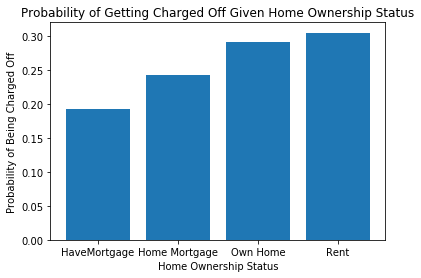

In [116]:
##How does the house ownership status impact the loan application?
visual = data_clean.copy()
visual.head()
status = visual['Loan Status']
print(visual['Loan Status'].unique())
loan_stat = [1 if i == 'Charged Off' else 0 for i in status]
visual['charged_off'] = loan_stat
home_ownership = visual.groupby('Home Ownership').mean()['charged_off']
x = home_ownership.index
y = home_ownership.values
plt.bar(x, y)
plt.xlabel("Home Ownership Status")
plt.ylabel("Probability of Being Charged Off")
plt.title("Probability of Getting Charged Off Given Home Ownership Status")

**Visualization 2**

**What insights does this visualization offer?**

This insights offer how the total number of past credit problems might affect the probability of the loan being charged off and the loan application being denied. From the graph, we can see that number of past credit problems does not have much influence of the probability of loan getting charged off when the problems are lower than 3 times. However, if the problems are greater than 3, the more past credit problem a person has, the more likely the person's loan(application) will get charged off. And we can see a threshold when the problems are greater than 8 times that the person will extremely likely to get denied for a loan application (loan being charged off)

Text(0.5, 1.0, 'Number of Credit Problems & Probability of being charged off')

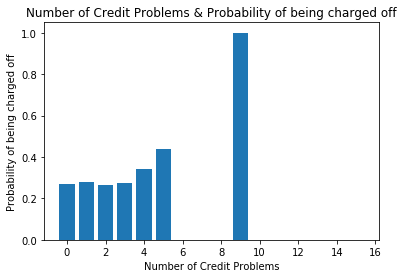

In [154]:
## measure the how number of credit problems in the past are likely to influence the loan status
years= visual['Years of Credit History']
loan_year = [int(i) for i in years]
visual['loan_year'] = loan_year
average_year_of_history = visual.groupby('Number of Credit Problems').mean()['charged_off']
x_h = average_year_of_history.index
y_h = average_year_of_history.values
plt.bar(x_h, y_h)
plt.xlabel("Number of Credit Problems")
plt.ylabel("Probability of being charged off")
plt.title("Number of Credit Problems & Probability of being charged off")

------------------------

**Visualization 3**

**What insights does this visualization offer?**

This insights offer how the total years in current job might affect the probability of the loan being charged off and the loan application being denied. We can conclude that the total years in current job does not have a strong relationship with the probability of the loan being charged off. As we can see across all the different times in the current job, the probability of the loan being charged off doesn't vary much.

Text(0.5, 1.0, 'Years in Current Job & Probability of being charged off')

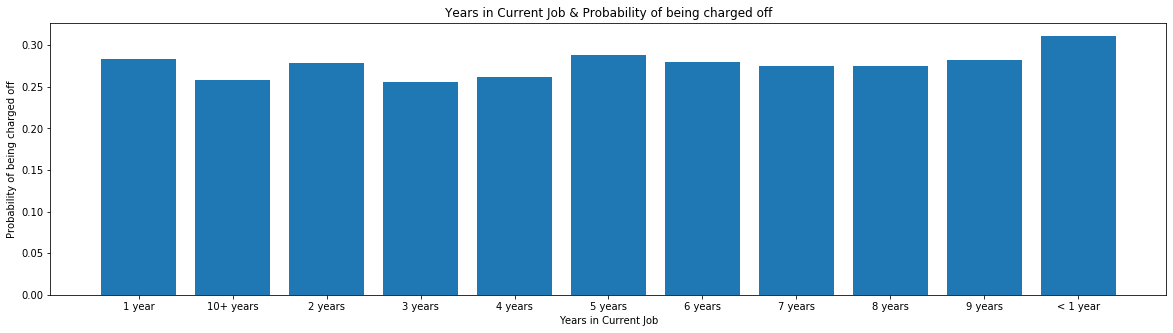

In [151]:
##the total years in current job & the probability of the loan being charged off
income = visual['Annual Income']
credit_score = [int(np.log(i)) for i in income]
visual['credit_score'] = credit_score
average_year_of_history = visual.groupby('Years in current job').mean()['charged_off']
x = average_year_of_history.index
y = average_year_of_history.values
plt.figure(figsize=(20,5))
plt.bar(x, y)
plt.xlabel("Years in Current Job")
plt.ylabel("Probability of being charged off")
plt.title("Years in Current Job & Probability of being charged off")

### **Question 4:** What is your hypothesis?

My hypothesis is that the number of past credit problems can help predict the probability that a credit loan being charged off. Especially if the past credit problem has exceed 8 times.

### **Question 5:** Analyze the dataset and make an inference about your hypothesis.

Text(0.5, 1.0, 'Number of Credit Problems & Probability of being charged off')

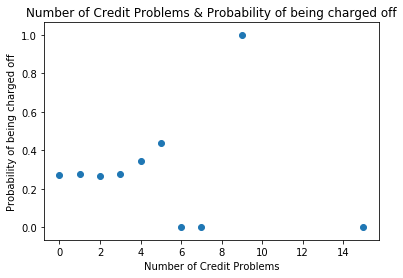

In [157]:
# Write the code for your analysis hereplt.bar(x, y)
plt.scatter(x_h, y_h)
plt.xlabel("Number of Credit Problems")
plt.ylabel("Probability of being charged off")
plt.title("Number of Credit Problems & Probability of being charged off")


In [159]:
regressiondata = {'num_probs':x_h, 'pro_off':y_h} 
regressiondf = pd.DataFrame(regressiondata)
import statsmodels.formula.api as sm
result = sm.ols(formula="pro_off ~ num_probs", data=regressiondf).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                pro_off   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.121
Method:                 Least Squares   F-statistic:                   0.03156
Date:                Tue, 27 Oct 2020   Prob (F-statistic):              0.863
Time:                        05:01:47   Log-Likelihood:                -1.4283
No. Observations:                  10   AIC:                             6.857
Df Residuals:                       8   BIC:                             7.462
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3089      0.157      1.964      0.0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


*Enter your conclusion here*
Here when we look at the visualization of the graph, with some out-laier, the rest of the past credit problem and the probability of the loan getting charged off might have a linear relationship. Assuming all the OLS assumption hold true, we can try to run a least-squared linear regression. From the summary printed above, we can see that our slope of the coefficient is -0.0042, which is unlikely consider each additional increase in problem should review a worst credit habit of a applicator, and the R^2 is only 0.004. This means that our model does not fit the data well and we can see that with a t value of -0.178, with a significant level of either 1% or 5%, we fall to reject the null hypothesis (number of past history problem does not have an impact to the probability of the loan getting charged off). Thus, we can conclude that at a inference of 5% significant level, we fail to reject the null hypothesis and that the number of past practice problem does not help predicting the probability of a loan getting charged off.

# Part 3: Preprocessing and Feature Engineering

 The objective you are working towards is building a classifier that will allow you to classify whether a loan will be fully paid or charged off using some or all of the following pieces of data: 
* Loan ID
* Customer ID
* Loan Status
* Current Loan Amount
* Term
* Credit Score
* Annual Income
* Years in current job
* Home Ownership
* Purpose
* Monthly Debt
* Years of Credit History
* Months since last delinquent
* Number of Open Accounts
* Number of Credit Problems
* Current Credit Balance
* Maximum Open Credit
* Bankruptcies
* Tax Liens

This notebook contains a reference implementation that uses *Number of Open Accounts*, *Monthly Debt*, *Bankruptcies*, and *Home Ownership* to predict *Loan Status*. These features are not sufficient to achieve the accuracy threshold required for this assignment. You should use this code as an example and a scaffold for your own solution. 

In [123]:
visual.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,charged_off,loan_year
5,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,...,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,19
6,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,...,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,22
12,2e841c8f-3dc1-464d-91c1-3d3d51e64c38,2ac05980-7848-4692-89ae-9321afe650f8,Fully Paid,234124.0,Short Term,727.0,693234.0,10+ years,Rent,Debt Consolidation,...,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0,0,24
14,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,Fully Paid,666204.0,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,...,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0,0,22
17,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,...,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0,1,17


### **Question 6:** Which metrics do you think are good indicators of loan status?  Create a new Dataframe preprocessed_data with all the columns (at least 4) that you determine to be good indicators of loan status.

In [236]:
# Modify the line below to select your columns
selected_columns = ['Months since last delinquent', 'Annual Income', 'Years of Credit History', 'Term']

def select_columns():
    ft = FunctionTransformer(lambda x: x[selected_columns])
    ft.get_feature_names = lambda: selected_columns
    return ft

In [237]:
# Review the feature building pipeline to ensure that it looks as you expect
select_pipeline = make_pipeline(select_columns())
select_pipeline.fit_transform(data_clean).head()

,Months since last delinquent,Annual Income,Years of Credit History,Term
5,10.0,1184194.0,19.6,Short Term
6,33.0,2559110.0,22.6,Short Term
12,46.0,693234.0,24.7,Short Term
14,34.0,1821967.0,22.0,Long Term
17,53.0,1133274.0,17.4,Long Term


<!--
BEGIN QUESTION
name: q6a_select_columns
manual: false
points: 1
-->

In [238]:
grader.check("q6a_select_columns")

All tests passed!

### **Question 7:** Are the numerical features useful for prediction in their current form? Modify the code below to ensure the numerical features are formatted suitably.

In [239]:
def numerical_transforms():
    return ColumnTransformer([
        # Edit this section so that it includes your chosen features
        ('Years of Credit History', StandardScaler(), ['Years of Credit History']),
        ('Annual Income', StandardScaler(), ['Annual Income']),
        ('Months since last delinquent', StandardScaler(), ['Months since last delinquent'])],
        remainder='passthrough')

# Review the feature building pipeline to ensure that it looks as you expect
num_pipeline = make_pipeline(select_columns(), numerical_transforms())
pd.DataFrame(num_pipeline.fit_transform(data_clean), columns=selected_columns).head()

,Months since last delinquent,Annual Income,Years of Credit History,Term
0,0.0731106,-0.289301,-1.13797,Short Term
1,0.522191,1.17457,-0.0881591,Short Term
2,0.836548,-0.812026,0.505211,Short Term
3,0.432375,0.389737,-0.0425153,Long Term
4,-0.256215,-0.343515,0.824718,Long Term


<!--
BEGIN QUESTION
name: q7a_numerical_transform_columns
manual: false
points: 1
-->

In [240]:
grader.check("q7a_numerical_transform_columns")

All tests passed!

<!--
BEGIN QUESTION
name: q7b_numerical_transform_rows
manual: false
points: 1
-->

In [241]:
grader.check("q7b_numerical_transform_rows")

All tests passed!

### **Question 8:** Convert all your non-numerical features to numerical form that you believe would be useful for your model.

In [242]:
def categorical_transforms():
    # Edit this ColumnTransformer to account for your chosen features
    return ColumnTransformer([
        ('Term', OneHotEncoder(sparse=False), [list(selected_columns).index('Term')])],
        remainder='passthrough')

full_pipeline = make_pipeline(select_columns(), numerical_transforms(), categorical_transforms())

# Review the feature building pipeline to ensure that it looks as you expect
full_pipeline.fit_transform(data_clean)[:5]


array([[0.0, 1.0, 0.0731106194201689, -0.2893006412556588,
        -1.1379680902982923],
       [0.0, 1.0, 0.5221911635695661, 1.174573074456599,
        -0.08815912184941284],
       [0.0, 1.0, 0.8365475444741438, -0.8120259855429389,
        0.5052111646651711],
       [1.0, 0.0, 0.43237505473968646, 0.38973657359306924,
        -0.0425152536559833],
       [1.0, 0.0, -0.25621511295605615, -0.34351518934737363,
        0.8247182420191779]], dtype=object)

<!--
BEGIN QUESTION
name: q8a_categorical_transform_rows
manual: false
points: 1
-->

In [243]:
grader.check("q8a_categorical_transform_rows")

All tests passed!

# Part 4: Model Building

We are now ready to build a model. We tranform the cleaned data from Part 1 using the features defined in Part 3. Then we split it into training, validation, and test data sets. Before fitting, we balance the data by resampling to achieve an equal number of positive and negative outcomes in each data set.

In [244]:
full_pipeline.fit(data_clean)
X = full_pipeline.transform(data_clean)
y = data_clean['Loan Status'] == 'Fully Paid'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.34, random_state=43)

def upsample(X, y):
    each_ct = len(y[y])
    assert len(y[~y]) < each_ct
    X0, y0 = sklearn.utils.resample(X[~y], y[~y], replace=True, n_samples=each_ct)
    X1, y1 = X[y], y[y]
    return np.concatenate([X0, X1]), np.concatenate([y0, y1])

X_train, y_train = upsample(X_train, y_train)
X_validation, y_validation = upsample(X_validation, y_validation)
X_test, y_test = upsample(X_test, y_test)

### **Question 9:** Implement and compare three of the following classification models and determine what works best for the problem and your choice of features.
1. Logistic Regression
2. K-Nearest Neighbors (KNN) 
3. Support Vector Machines (SVM)
4. Perceptron
5. XGBoost
6. Random Forest

Be sure to use:
* X_train, y_train to train the models in Question 9a, 9b,..., 9f
* X_validation, y_validation to validate the models in Question 9a, 9b,..., 9f
* X_test, y_test to test the best model in Question 10

#### Question 9a: Logistic Regression

In [245]:
# Choose at least for models to implement - your code here

logreg = LogisticRegression(max_iter=1000)                                # instantiate
logreg.fit(X_train, y_train)                                 
y_prediction = logreg.predict(X_validation)                               # predict
acc_logreg = sum(y_prediction == y_validation)/len(y_validation)*100      # evaluate

print('Logistic Regression validation accuracy:', str(round(acc_logreg,2)),'%')

Logistic Regression validation accuracy: 58.19 %


#### Question 9b: KNN

In [246]:
# Choose at least for models to implement - your code here
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate
knn.fit(X_train, y_train)                                    # fit
acc_knn = knn.score(X_validation, y_validation)                            # predict + evaluate
print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')

K-Nearest Neighbors labeling accuracy: 51.7 %


#### Question 9c: SVM

In [247]:
# Choose at least for models to implement - your code here
svc = SVC()                                                  # instantiate
svc.fit(X_train, y_train)                                    # fit
acc_svc = svc.score(X_validation, y_validation)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 57.97 %


#### Question 9d: Perceptron

In [248]:
# Choose at least for models to implement - your code here
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, y_train)                             # fit
acc_perceptron = perceptron.score(X_validation, y_validation)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 51.6 %


#### Question 9e: XGBoost

In [249]:
# Choose at least for models to implement - your code here
# XGBoost, same API as scikit-learn
gradboost = xgb.XGBClassifier(n_estimators=1000)             # instantiate
gradboost.fit(X_train, y_train)                              # fit
acc_xgboost = gradboost.score(X_validation, y_validation)                  # predict + evalute

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 55.58 %


#### Question 9f: Random Forest

In [250]:
# Choose at least for models to implement - your code here
# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)   # instantiate
random_forest.fit(X_train, y_train)                         # fit
acc_rf = random_forest.score(X_validation, y_validation)                  # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_rf*100,2)),'%')

K-Nearest Neighbors labeling accuracy: 51.42 %


### **Question 10:** Which model has the best performance?

In [251]:
best_model = logreg

In [252]:
test_score = best_model.score(X_test, y_test)

print("The test accuracy of your best model is", str(round(test_score*100,2)))

The test accuracy of your best model is 58.76


<!--
BEGIN QUESTION
name: q10a_test_result
manual: false
points: 5
-->

In [253]:
grader.check("q10a_test_result")

All tests passed!

### **Question 11:** How does the model perform on reference data?

We have included an additional evaluation data set containing values that we have have cleaned for you. Run your preprocessing and feature building pipeline using these features. If you are having trouble getting good results on this part, or on Question 10, go back to your data cleaning.

In [254]:
# Compare to an evaluation with the reference solution.
eval_data = pd.read_csv("hw_eval.csv")

X_eval = full_pipeline.transform(eval_data)
y_eval = eval_data['Loan Status'] == 'Fully Paid'

eval_score = best_model.score(X_eval, y_eval)

print("The accuracy of your best model on reference cleaned data", str(round(eval_score*100,2)))

The accuracy of your best model on reference cleaned data 57.67


<!--
BEGIN QUESTION
name: q11a_evalation_result
manual: false
points: 5
-->

In [255]:
grader.check("q11a_evalation_result")

All tests passed!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please restart kernel and run all, then save before submitting!**